In [190]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df_embeddings = pd.read_csv('data/embeddings_count_tfidf.csv')
df_features_nltk = pd.read_csv('data/features_nltk.csv')
df_features_nltk = df_features_nltk.iloc[:, [-1] + list(range(df_features_nltk.shape[1] - 1))]
print(df_features_nltk.shape)
df_embeddings.head()

(26709, 45)


,headline,headline_cleaned,tokenized_text_nltk,lemmatized_text_nltk,tokenized_word2vec,lemmatized_word2vec,Tokenized_lda_topics,Lemmatized_lda_topics,tokenized_count_top,lemmatized_count_top,tokenized_tfidf_top,lemmatized_tfidf_top,tokenized_count_features,lemmatized_count_features,tokenized_tfidf_features,lemmatized_tfidf_features
0,former versace store clerk sues over secret 'b...,former versace store clerk sues over secret bl...,"['former', 'versace', 'store', 'clerk', 'sues'...","['former', 'versace', 'store', 'clerk', 'sue',...","[[array([-0.43837157, 0.58287364, 0.19125707...","[[array([-0.33812404, 0.46170712, 0.20136467...","[0.6587515, 0.13160998, 0.15129738, 0, 0, 0, 0...","[0, 0, 0, 0, 0.5502972, 0, 0, 0.16726343, 0.21...","[('store', 1), ('for', 1), ('over', 1), ('blac...","[('store', 1), ('secret', 1), ('black', 1), ('...","[('store', 0.5083117545808206), ('secret', 0.4...","[('store', 0.5539912187983203), ('former', 0.5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,the 'roseanne' revival catches up to our thorn...,the roseanne revival catches up to our thorny ...,"['the', 'roseanne', 'revival', 'catches', 'up'...","['roseanne', 'revival', 'catch', 'thorny', 'po...","[[array([-0.3913705 , 0.66930324, 0.37109652...","[[array([-2.13376507e-02, 1.13002434e-02, 4....","[0, 0, 0, 0.09271612, 0, 0, 0.29359663, 0, 0, ...","[0.25332785, 0.13779792, 0.012474524, 0.521549...","[('political', 1), ('to', 1), ('the', 1), ('wo...","[('political', 1), ('worse', 1), ('better', 1)...","[('worse', 0.4915417386795098), ('political', ...","[('worse', 0.6308847294324276), ('political', ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,mom starting to fear son's web series closest ...,mom starting to fear sons web series closest t...,"['mom', 'starting', 'to', 'fear', 'sons', 'web...","['mom', 'starting', 'fear', 'son', 'web', 'ser...","[[array([-0.45669025, 0.5519147 , 0.15571344...","[[array([-0.48673087, 0.66130924, 0.27738553...","[0, 0, 0.10913839, 0, 0, 0.14692147, 0.6006219...","[0, 0, 0, 0, 0, 0.106005505, 0.661389, 0, 0.16...","[('to', 2), ('she', 1), ('mom', 1), ('have', 1...","[('son', 1), ('thing', 1), ('fear', 1), ('star...","[('starting', 0.4073715548705109), ('fear', 0....","[('starting', 0.4442541411798445), ('series', ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"boehner just wants wife to listen, not come up...",boehner just wants wife to listen not come up ...,"['boehner', 'just', 'wants', 'wife', 'to', 'li...","['boehner', 'just', 'want', 'wife', 'listen', ...","[[array([-9.49449018e-02, 1.09984197e-01, 5....","[[array([-0.08858118, 0.10860618, 0.04547911...","[0.7005495, 0, 0, 0.15679379, 0, 0, 0, 0.08882...","[0.39957175, 0.3713594, 0, 0, 0, 0, 0, 0.15915...","[('wants', 1), ('with', 1), ('ideas', 1), ('wi...","[('not', 1), ('come', 1), ('idea', 1), ('want'...","[('ideas', 0.4591788451187499), ('wife', 0.422...","[('wife', 0.4842297879191579), ('idea', 0.4682...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,j.k. rowling wishes snape happy birthday in th...,jk rowling wishes snape happy birthday in the ...,"['jk', 'rowling', 'wishes', 'snape', 'happy', ...","['jk', 'rowling', 'wish', 'snape', 'happy', 'b...","[[array([-0.02763296, 0.02903345, 0.01293967...","[[array([-2.35210881e-02, 3.10611948e-02, 1....","[0, 0, 0, 0, 0, 0.92408365, 0, 0, 0, 0]","[0.3508932,

In [108]:
from numpy import array, float32
def sentence_vector(word2vecs):
    word2vecs = eval(word2vecs)
    return np.mean(word2vecs, axis=0).flatten()

sentence_vectors_tokenized_word2vec = df_embeddings['tokenized_word2vec'].apply(sentence_vector)
sentence_vectors_lemmatized_word2vec = df_embeddings['lemmatized_word2vec'].apply(sentence_vector)


In [109]:
def top5_score(tfidf_top):
    tfidf_top = eval(tfidf_top)
    scores = []
    for word, score in tfidf_top:
        scores.append(score)
    return scores

top5_scores_tokenized_tfidf = df_embeddings['tokenized_tfidf_top'].apply(top5_score)
top5_scores_lemmatized_tfidf = df_embeddings['lemmatized_tfidf_top'].apply(top5_score)


In [ ]:
sentence_vectors_tokenized_word2vec = pd.DataFrame(sentence_vectors_tokenized_word2vec.tolist(), columns=[f'tokenized_word2vec_{i+1}' for i in range(100)])
sentence_vectors_lemmatized_word2vec = pd.DataFrame(sentence_vectors_lemmatized_word2vec.tolist(), columns=[f'lemmatized_word2vec_{i+1}' for i in range(100)])
top5_scores_tokenized_tfidf = pd.DataFrame(top5_scores_tokenized_tfidf.tolist(), columns=[f'top{i+1}_tokenized_tfidf' for i in range(5)])
top5_scores_lemmatized_tfidf = pd.DataFrame(top5_scores_lemmatized_tfidf.tolist(), columns=[f'top{i+1}_lemmatized_tfidf' for i in range(5)])

df = pd.concat([df_features_nltk, sentence_vectors_tokenized_word2vec, sentence_vectors_lemmatized_word2vec, top5_scores_tokenized_tfidf, top5_scores_lemmatized_tfidf], axis=1)
df.head(5)

lemmatized_word2vec_1     -0.171785
lemmatized_word2vec_2      0.244275
lemmatized_word2vec_3      0.101723
lemmatized_word2vec_4      0.036859
lemmatized_word2vec_5      0.096946
                             ...   
lemmatized_word2vec_96     0.203868
lemmatized_word2vec_97     0.207969
lemmatized_word2vec_98    -0.309393
lemmatized_word2vec_99     0.103240
lemmatized_word2vec_100    0.122612
Name: 0, Length: 100, dtype: float32


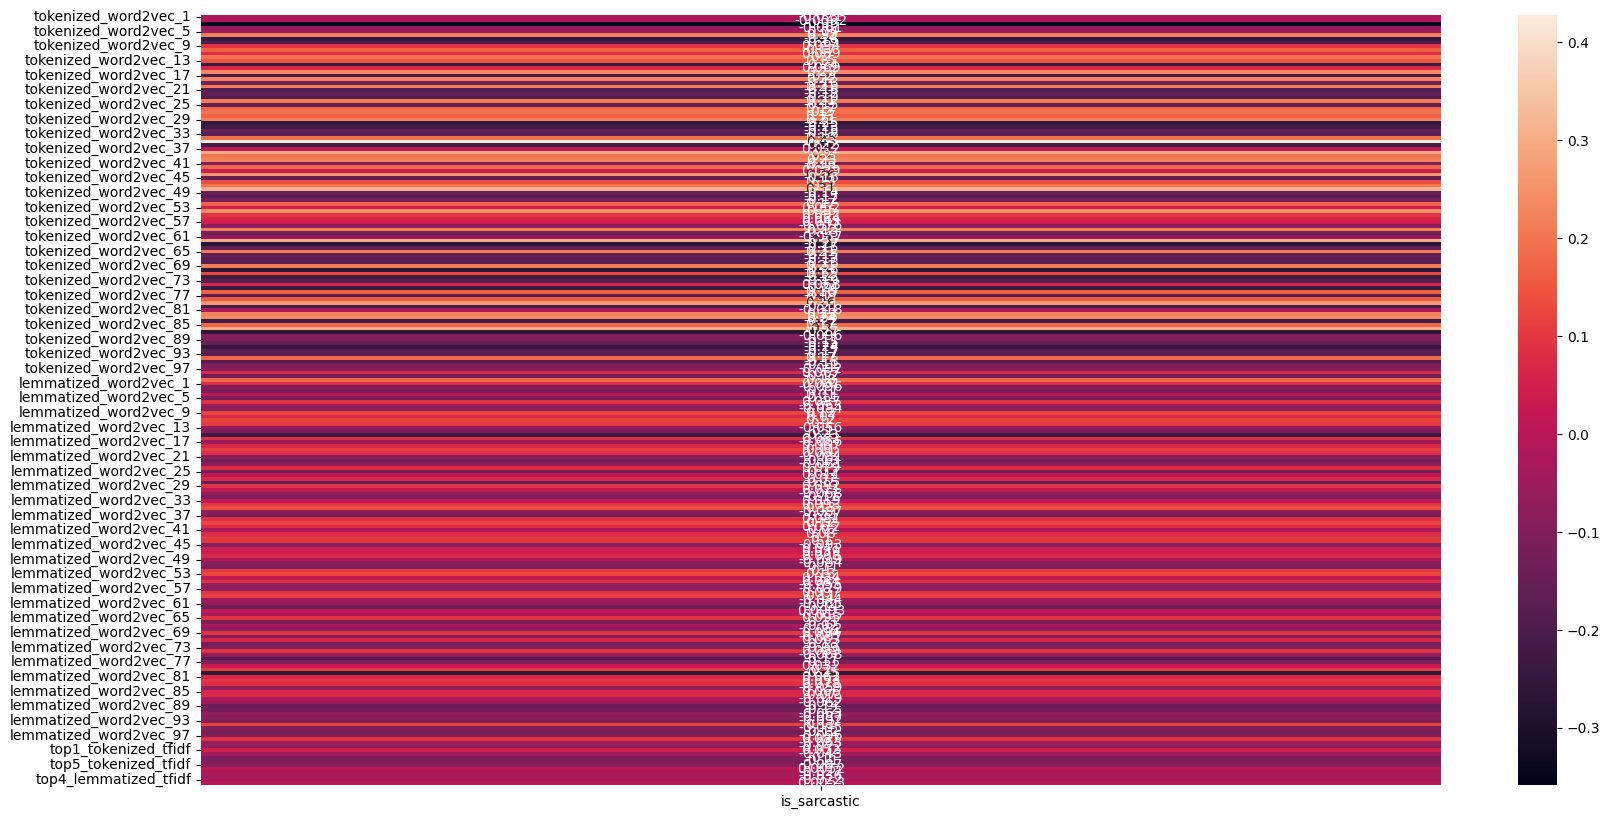

In [141]:
features = df.columns.tolist()[45:]
rows = [{'is_sarcastic':df[f].corr(df['is_sarcastic'])} for f in features]
correlations = pd.DataFrame(rows, index=features)
plt.figure(figsize = (20,10))
sns.heatmap(correlations, annot=True)
plt.show()

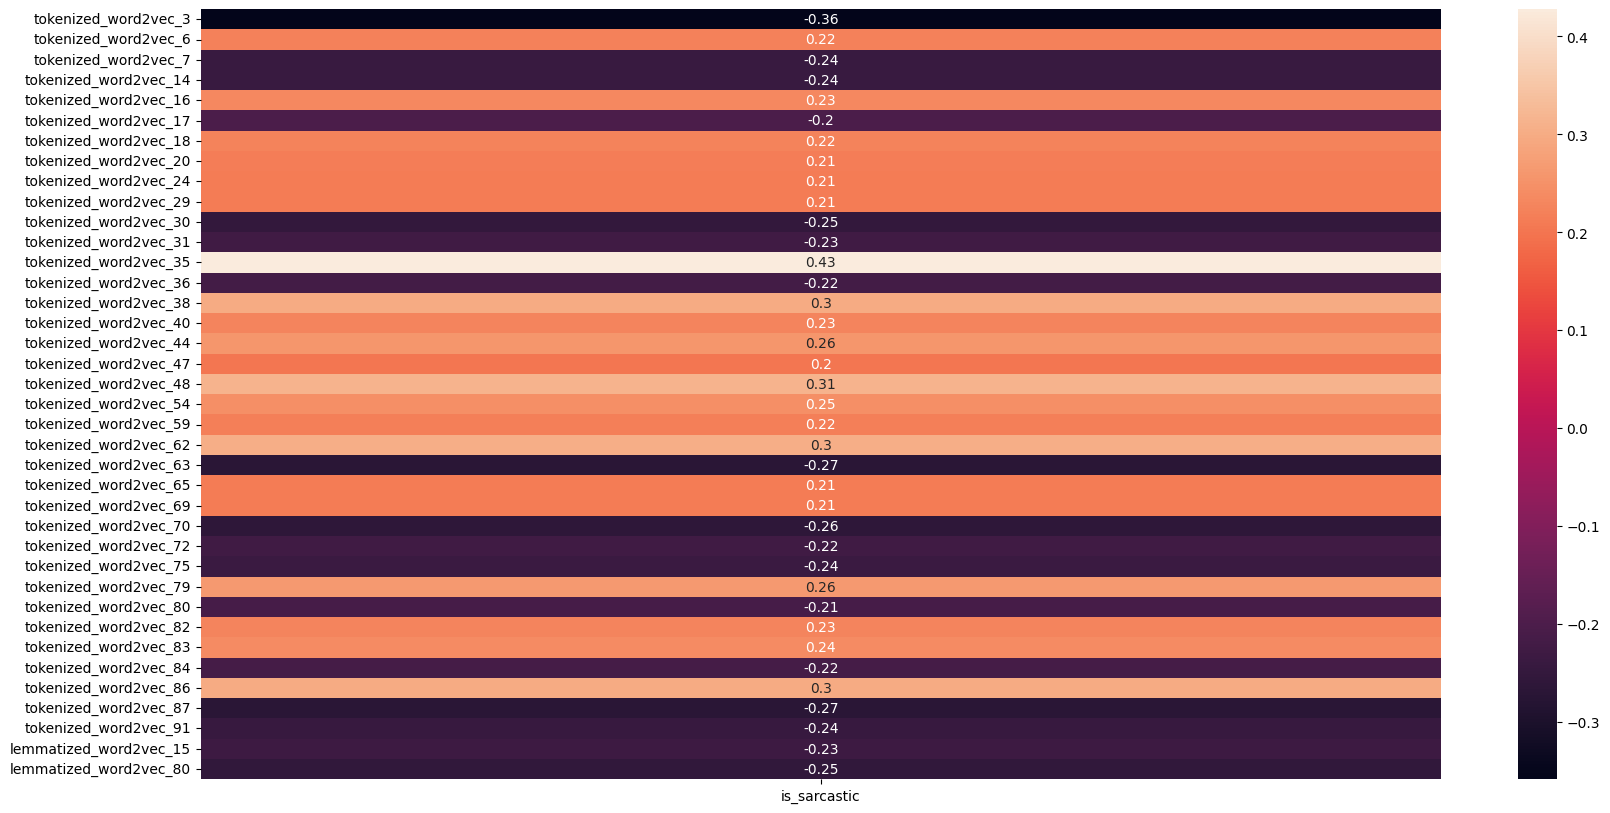

['tokenized_word2vec_3', 'tokenized_word2vec_6', 'tokenized_word2vec_7', 'tokenized_word2vec_14', 'tokenized_word2vec_16', 'tokenized_word2vec_17', 'tokenized_word2vec_18', 'tokenized_word2vec_20', 'tokenized_word2vec_24', 'tokenized_word2vec_29', 'tokenized_word2vec_30', 'tokenized_word2vec_31', 'tokenized_word2vec_35', 'tokenized_word2vec_36', 'tokenized_word2vec_38', 'tokenized_word2vec_40', 'tokenized_word2vec_44', 'tokenized_word2vec_47', 'tokenized_word2vec_48', 'tokenized_word2vec_54', 'tokenized_word2vec_59', 'tokenized_word2vec_62', 'tokenized_word2vec_63', 'tokenized_word2vec_65', 'tokenized_word2vec_69', 'tokenized_word2vec_70', 'tokenized_word2vec_72', 'tokenized_word2vec_75', 'tokenized_word2vec_79', 'tokenized_word2vec_80', 'tokenized_word2vec_82', 'tokenized_word2vec_83', 'tokenized_word2vec_84', 'tokenized_word2vec_86', 'tokenized_word2vec_87', 'tokenized_word2vec_91', 'lemmatized_word2vec_15', 'lemmatized_word2vec_80']
the number of all embedding features: 210
the numb

In [144]:
# set the threshold to be 0.2, meaning that the absolute value of correlation should at least 0.2
masking = list(map(lambda x: abs(max(correlations.iloc[x], key=abs))>0.2, range(len(correlations))))

# potentially useful features
plt.figure(figsize = (20,10))
sns.heatmap(correlations[masking], annot=True)
plt.show()

print(correlations[masking].index.tolist())
print(f'the number of all embedding features: {len(features)}\nthe number of potential embedding features: {len(correlations[masking])}')

In [150]:
selected_features = ['num_words_vs_length', 'length_vs_num_words', 'num_stopwords',
       'stopwords_vs_length', 'stopwords_vs_words', 'num_question_marks',
       'question_vs_length', 'question_vs_words', 'unique_vs_words', 'readability']

final_features = selected_features + correlations[masking].index.tolist()
df[final_features].describe()

df[['is_sarcastic']+final_features].to_csv('data/baseline_train.csv', index=False)

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, log_loss,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

df_baseline = pd.read_csv('data/baseline_train.csv')
df_baseline.head()

,is_sarcastic,num_words_vs_length,length_vs_num_words,num_stopwords,stopwords_vs_length,stopwords_vs_words,num_question_marks,question_vs_length,question_vs_words,unique_vs_words,...,tokenized_word2vec_79,tokenized_word2vec_80,tokenized_word2vec_82,tokenized_word2vec_83,tokenized_word2vec_84,tokenized_word2vec_86,tokenized_word2vec_87,tokenized_word2vec_91,lemmatized_word2vec_15,lemmatized_word2vec_80
0,0,0.153846,6.500000,2,0.025641,0.166667,0,0.0,0.0,1.000000,...,-0.301109,-0.047107,0.056574,0.007056,0.509199,-0.158689,0.175177,0.453312,0.031052,0.024123
1,0,0.166667,6.000000,6,0.071429,0.428571,0,0.0,0.0,1.000000,...,-0.366887,0.026622,-0.060481,-0.082220,0.670555,-0.231964,0.274154,0.608052,0.020151,0.016903
2,1,0.177215,5.642857,5,0.063291,0.357143,0,0.0,0.0,0.857143,...,-0.363500,0.100679,-0.186708,-0.164838,0.735879,-0.240011,0.340678,0.625277,0.048904,0.029536
3,1,0.154762,6.461538,5,0.059524,0.384615,0,0.0,0.0,1.000000,...,-0.355013,0.065159,-0.095029,-0.160504,0.756865,-0.237036,0.303813,0.641601,0.063795,0.034889
4,0,0.171875,5.818182,3,0.046875,0.272727,0,0.0,0.0,1.000000,...,-0.319627,0.007949,0.004455,-0.055783,0.550582,-0.196718,0.214980,0.511133,0.036237,0.026512


In [188]:
def model_evaluation(model, train):
    features = train.columns[1:]
    labels = train.columns[:1]
    kf = KFold(n_splits=5)
    validation_scores = pd.DataFrame({'accuracy':[], 'precision_weighted':[], 'recall_weighted':[], 
                                      'f1_weighted':[], 'log_loss':[], 'roc_auc_weighted':[]})
    for train_index, test_index in kf.split(train):
        train_split = train.iloc[train_index]
        test_split = train.iloc[test_index]
        print('Starting fitting...')
        model.fit(train_split[features], train_split[labels])
        predictions = model.predict(test_split[features])
        predictions_proba = model.predict_proba(test_split[features])
        scores = [accuracy_score(test_split[labels], predictions), precision_score(test_split[labels], predictions, average="weighted"),
                  recall_score(test_split[labels], predictions, average="weighted"), f1_score(test_split[labels], predictions, average="weighted"),
                  log_loss(test_split[labels], predictions_proba), roc_auc_score(test_split[labels], predictions_proba[:,1], average="weighted")]
        validation_scores.loc[len(validation_scores)] = scores
        print(f'Evaluation Scores:\n{scores}\n')
    return validation_scores   

In [212]:
classifier_lr = LogisticRegression(max_iter=10000, class_weight='balanced')
scores_lr = model_evaluation(classifier_lr, df_baseline)
scores_lr

Starting fitting...
Evaluation Scores:
[0.7317484088356421, 0.7506287499372418, 0.7317484088356421, 0.7320113042327432, 0.5424015746053222, 0.8031172488337694]

Starting fitting...
Evaluation Scores:
[0.7416697865967802, 0.7615991568801526, 0.7416697865967802, 0.7410631041781472, 0.5237474127186833, 0.8236071762609071]

Starting fitting...
Evaluation Scores:
[0.7442905278921752, 0.7611037898193022, 0.7442905278921752, 0.744868125857503, 0.5192830687500517, 0.8259599884225792]

Starting fitting...
Evaluation Scores:
[0.7411081991763384, 0.758896810327472, 0.7411081991763384, 0.7418339201798497, 0.5267685527453726, 0.8175895444898332]

Starting fitting...
Evaluation Scores:
[0.7403108032203707, 0.7581281253218681, 0.7403108032203707, 0.7411807261705492, 0.5278659761692209, 0.8217094000975507]



,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.731748,0.750629,0.731748,0.732011,0.542402,0.803117
1,0.741670,0.761599,0.741670,0.741063,0.523747,0.823607
2,0.744291,0.761104,0.744291,0.744868,0.519283,0.825960
3,0.741108,0.758897,0.741108,0.741834,0.526769,0.817590
4,0.740311,0.758128,0.740311,0.741181,0.527866,0.821709


In [195]:
classifier_rf = RandomForestClassifier(random_state = 0,class_weight='balanced',max_depth = 10)
scores_rf = model_evaluation(classifier_lr, df_baseline)
scores_rf

Starting fitting...
Evaluation Scores:
[0.7317484088356421, 0.7506287499372418, 0.7317484088356421, 0.7320113042327432, 0.5424015746053222, 0.8031172488337694]

Starting fitting...
Evaluation Scores:
[0.7416697865967802, 0.7615991568801526, 0.7416697865967802, 0.7410631041781472, 0.5237474127186833, 0.8236071762609071]

Starting fitting...
Evaluation Scores:
[0.7442905278921752, 0.7611037898193022, 0.7442905278921752, 0.744868125857503, 0.5192830687500517, 0.8259599884225792]

Starting fitting...
Evaluation Scores:
[0.7411081991763384, 0.758896810327472, 0.7411081991763384, 0.7418339201798497, 0.5267685527453726, 0.8175895444898332]

Starting fitting...
Evaluation Scores:
[0.7403108032203707, 0.7581281253218681, 0.7403108032203707, 0.7411807261705492, 0.5278659761692209, 0.8217094000975507]



,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.731748,0.750629,0.731748,0.732011,0.542402,0.803117
1,0.741670,0.761599,0.741670,0.741063,0.523747,0.823607
2,0.744291,0.761104,0.744291,0.744868,0.519283,0.825960
3,0.741108,0.758897,0.741108,0.741834,0.526769,0.817590
4,0.740311,0.758128,0.740311,0.741181,0.527866,0.821709


In [202]:
classifier_nb = GaussianNB()
scores_nb = model_evaluation(classifier_nb, df_baseline)
scores_nb

Starting fitting...
Evaluation Scores:
[0.605765630849869, 0.6385416842991578, 0.605765630849869, 0.6014617481441398, 6.285592952464866, 0.6616043491864831]

Starting fitting...
Evaluation Scores:
[0.6110071134406589, 0.6409526109271818, 0.6110071134406589, 0.6053670585999668, 6.1545728884128215, 0.6695237500764324]

Starting fitting...
Evaluation Scores:
[0.6179333582927743, 0.6510219343412889, 0.6179333582927743, 0.6144341480920336, 5.735094533868695, 0.6842637909333078]

Starting fitting...
Evaluation Scores:
[0.6102583302134033, 0.6443547672306895, 0.6102583302134033, 0.6069676512671122, 5.800892372901632, 0.680827594764828]

Starting fitting...
Evaluation Scores:
[0.6041939711664482, 0.6427611073691785, 0.6041939711664482, 0.5998869362057964, 5.816459178099319, 0.6776192602891832]



,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.605766,0.638542,0.605766,0.601462,6.285593,0.661604
1,0.611007,0.640953,0.611007,0.605367,6.154573,0.669524
2,0.617933,0.651022,0.617933,0.614434,5.735095,0.684264
3,0.610258,0.644355,0.610258,0.606968,5.800892,0.680828
4,0.604194,0.642761,0.604194,0.599887,5.816459,0.677619


In [205]:
classifier_svm = SVC(kernel='rbf', probability=True)
scores_svm = model_evaluation(classifier_svm, df_baseline)
scores_svm

Starting fitting...
Evaluation Scores:
[0.5701984275552228, 0.5575241759033751, 0.5701984275552228, 0.5108543401057907, 0.6760577958315617, 0.607813673341677]

Starting fitting...
Evaluation Scores:
[0.5752527143391988, 0.5799832829842237, 0.5752527143391988, 0.5133161898164024, 0.6739665701999087, 0.6181406926921622]

Starting fitting...
Evaluation Scores:
[0.572070385623362, 0.5587852243171132, 0.572070385623362, 0.5116755120098864, 0.6727229243061186, 0.6279245907292081]

Starting fitting...
Evaluation Scores:
[0.5868588543616623, 0.5811856721702389, 0.5868588543616623, 0.5284196498044464, 0.6676475290563477, 0.628486786553778]

Starting fitting...
Evaluation Scores:
[0.5854708856019472, 0.5766218245262091, 0.5854708856019472, 0.5253217535202622, 0.6687071176255752, 0.6288310575791942]



,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.570198,0.557524,0.570198,0.510854,0.676058,0.607814
1,0.575253,0.579983,0.575253,0.513316,0.673967,0.618141
2,0.572070,0.558785,0.572070,0.511676,0.672723,0.627925
3,0.586859,0.581186,0.586859,0.528420,0.667648,0.628487
4,0.585471,0.576622,0.585471,0.525322,0.668707,0.628831


In [208]:
classifier_ada = AdaBoostClassifier(random_state=0)
scores_ada = model_evaluation(classifier_ada, df_baseline)
scores_ada


Starting fitting...
Evaluation Scores:
[0.6862598277798577, 0.6900865449538887, 0.6862598277798577, 0.687233070314012, 0.6079163284703188, 0.7543730799863466]

Starting fitting...
Evaluation Scores:
[0.703481842006739, 0.7087788461873044, 0.703481842006739, 0.7041990722849877, 0.6041018282800785, 0.7791304886914103]

Starting fitting...
Evaluation Scores:
[0.7105952826656683, 0.7110007759793971, 0.7105952826656683, 0.7107784773717386, 0.5976321183394195, 0.7778961810599262]

Starting fitting...
Evaluation Scores:
[0.7064769749157619, 0.7145292611851997, 0.7064769749157619, 0.7077472406147047, 0.6005020067829109, 0.7723553139049271]

Starting fitting...
Evaluation Scores:
[0.7062347874929789, 0.7086663355799, 0.7062347874929789, 0.7070392851988249, 0.6013433714626466, 0.7726921790006569]



,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.686260,0.690087,0.686260,0.687233,0.607916,0.754373
1,0.703482,0.708779,0.703482,0.704199,0.604102,0.779130
2,0.710595,0.711001,0.710595,0.710778,0.597632,0.777896
3,0.706477,0.714529,0.706477,0.707747,0.600502,0.772355
4,0.706235,0.708666,0.706235,0.707039,0.601343,0.772692


In [218]:
scores_collection = pd.DataFrame({'model name': [], 'accuracy':[], 'precision_weighted':[], 'recall_weighted':[], 
                                      'f1_weighted':[], 'log_loss':[], 'roc_auc_weighted':[]})
scores_collection.loc[len(scores_collection)] = ['LogisticRegression']+np.mean(scores_lr,axis=0).tolist()
scores_collection.loc[len(scores_collection)] = ['RandomForest']+np.mean(scores_rf,axis=0).tolist()
scores_collection.loc[len(scores_collection)] = ['NaiveBayes']+np.mean(scores_nb,axis=0).tolist()
scores_collection.loc[len(scores_collection)] = ['SVM']+np.mean(scores_svm,axis=0).tolist()
scores_collection.loc[len(scores_collection)] = ['AdaBoost']+np.mean(scores_ada,axis=0).tolist()
scores_collection

,model name,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,LogisticRegression,0.739826,0.758071,0.739826,0.740191,0.528013,0.818397
1,RandomForest,0.739826,0.758071,0.739826,0.740191,0.528013,0.818397
2,NaiveBayes,0.609832,0.643526,0.609832,0.605624,5.958522,0.674768
3,SVM,0.577970,0.570820,0.577970,0.517917,0.671820,0.622239
4,AdaBoost,0.702610,0.706612,0.702610,0.703399,0.602299,0.771289
